In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nqs.state.utils import plot_style

# Paths to data
DATA_PATH = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/final_results_omega_{omega}.csv"


# Combine omega
omegas = [1.0]
dfs = []
for omega in omegas:
    df = pd.read_csv(DATA_PATH.format(omega=omega))
    df["omega"] = omega
    dfs.append(df)

# Preprocess data
dfs = [df.dropna(subset=["time_train"]) for df in dfs]
dfs = [df[df["nsamples"] == 524288] for df in dfs]
dfs = [df.drop(columns=[col for col in df.columns if "time" not in col and "nqs_type" not in col and "n_particles" not in col and "Opti" not in col]) for df in dfs]
dfs = [df.sort_values(by="n_particles") for df in dfs]

print(dfs)
# Combine all dataframes into one
combined_df = pd.concat(dfs)

# Filter the data by nqs_type
df_vmc = combined_df[combined_df["nqs_type"] == "vmc"]
df_rbm = combined_df[combined_df["nqs_type"] == "rbm"]
df_dsffn = combined_df[combined_df["nqs_type"] == "dsffn"]




[   nqs_type  n_particles     Opti  time_train  time_sample
30      rbm            2  rmsprop   14.935537    95.652872
78      rbm            2  rmsprop   16.433255    94.329782
54      rbm            2  rmsprop   14.772146    87.469668
62      vmc            2  rmsprop   16.103423    79.959505
94    dsffn            2  rmsprop   22.238832    88.639880
..      ...          ...      ...         ...          ...
95    dsffn           22  rmsprop  311.783664   303.752877
79      rbm           22  rmsprop  254.791783   265.291801
53    dsffn           22  rmsprop  302.393796   330.793030
63      vmc           22  rmsprop  265.061446   295.668058
71    dsffn           22  rmsprop  340.341615   302.695282

[72 rows x 5 columns]]


/var/folders/2s/d8fpjk816ql0n2mnpb562zw00000gn/T/ipykernel_31824/2220612548.py:8: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.lineplot(data=df_vmc, x="n_particles", y="time_train", hue="Opti", ax=axs[0], palette=palette)
/var/folders/2s/d8fpjk816ql0n2mnpb562zw00000gn/T/ipykernel_31824/2220612548.py:24: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.lineplot(data=df_rbm, x="n_particles", y="time_train", hue="Opti", ax=axs[1], palette=palette)
/var/folders/2s/d8fpjk816ql0n2mnpb562zw00000gn/T/ipykernel_31824/2220612548.py:48: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.lineplot(data=df_dsffn, x="n_particles", y="time_train", hue="Opti", ax=axs[2], palette=palette)


Saving figure to /Users/orpheus/Documents/Masters/NeuralQuantumState/analysis/figs/time_scaling_2d.pdf


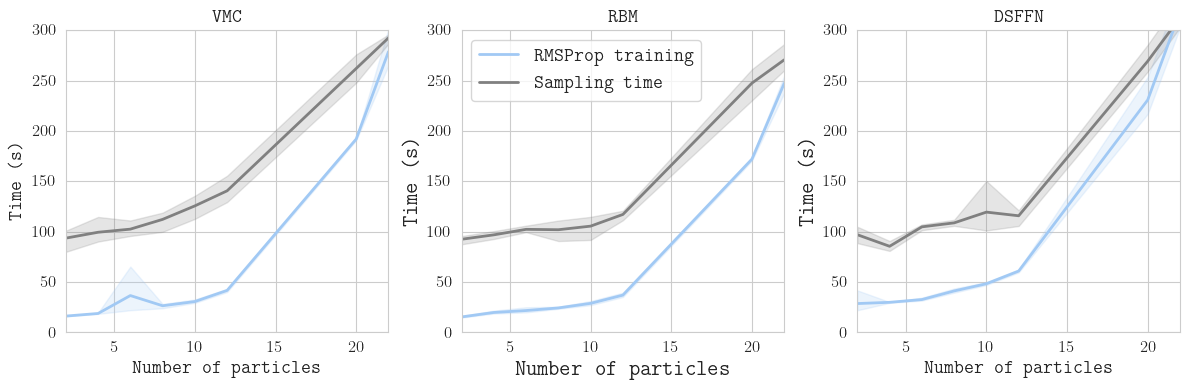

In [11]:
# Define a color palette to ensure consistency across plots
palette = sns.color_palette("pastel")

# Plotting the time data
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# VMC plot
sns.lineplot(data=df_vmc, x="n_particles", y="time_train", hue="Opti", ax=axs[0], palette=palette)
rms_time_sample_vmc = df_vmc[df_vmc["Opti"] == "rmsprop"]
sns.lineplot(data=rms_time_sample_vmc, x="n_particles", y="time_sample", color="gray", ax=axs[0])

# Remove legend from VMC plot
axs[0].get_legend().remove()
axs[0].set_ylabel("Time (s)", fontsize=14)
axs[0].set_xlabel("Number of particles", fontsize=14)
axs[0].set_title("VMC", fontsize=14)
# set xlimit 
axs[0].set_xlim(2, 22)
#set ylimit
axs[0].set_ylim(0, 300)


# RBM plot
sns.lineplot(data=df_rbm, x="n_particles", y="time_train", hue="Opti", ax=axs[1], palette=palette)
rms_time_sample_rbm = df_rbm[df_rbm["Opti"] == "rmsprop"]
sns.lineplot(data=rms_time_sample_rbm, x="n_particles", y="time_sample", color="gray", ax=axs[1])

# Customize the legend
handles, labels = axs[1].get_legend_handles_labels()
new_labels = []
for label in labels:
    if label == 'rmsprop':
        new_labels.append('RMSProp training')
    elif label == 'sr':
        new_labels.append('SR training')
    else:
        new_labels.append(label)
new_labels.append('Sampling time')
handles.append(plt.Line2D([], [], color="gray"))

axs[1].legend(handles, new_labels, loc="upper left")
axs[1].set_ylabel("Time (s)")
axs[1].set_xlabel("Number of particles")
axs[1].set_title("RBM", fontsize=14)
axs[1].set_xlim(2, 22)
axs[1].set_ylim(0, 300)
# DSFFN plot
sns.lineplot(data=df_dsffn, x="n_particles", y="time_train", hue="Opti", ax=axs[2], palette=palette)
rms_time_sample_dsffn = df_dsffn[df_dsffn["Opti"] == "rmsprop"]
sns.lineplot(data=rms_time_sample_dsffn, x="n_particles", y="time_sample", color="gray", ax=axs[2])

# Remove legend from DSFFN plot
axs[2].get_legend().remove()
axs[2].set_ylabel("Time (s)")
axs[2].set_xlabel("Number of particles", fontsize=14)
axs[2].set_title("DSFFN", fontsize=14)
axs[2].set_xlim(2, 22)
axs[2].set_ylim(0, 300)

plt.tight_layout()

plot_style.save("time_scaling_2d")

plt.show()

[   nqs_type  n_particles     Opti  time_train  time_sample
30      rbm            2  rmsprop   14.935537    95.652872
78      rbm            2  rmsprop   16.433255    94.329782
54      rbm            2  rmsprop   14.772146    87.469668
62      vmc            2  rmsprop   16.103423    79.959505
94    dsffn            2  rmsprop   22.238832    88.639880
..      ...          ...      ...         ...          ...
95    dsffn           22  rmsprop  311.783664   303.752877
79      rbm           22  rmsprop  254.791783   265.291801
53    dsffn           22  rmsprop  302.393796   330.793030
63      vmc           22  rmsprop  265.061446   295.668058
71    dsffn           22  rmsprop  340.341615   302.695282

[72 rows x 5 columns]]
vmc
rmsprop poly fit: a=0.05, b=2.76
rmsprop exp fit: a=6.60, b=0.17
rmsprop poly fit R²: 0.96
rmsprop exp fit R²: 0.98
rbm
rmsprop poly fit: a=0.04, b=2.78
rmsprop exp fit: a=5.70, b=0.17
rmsprop poly fit R²: 0.98
rmsprop exp fit R²: 0.99
dsffn
rmsprop poly fit: a=0

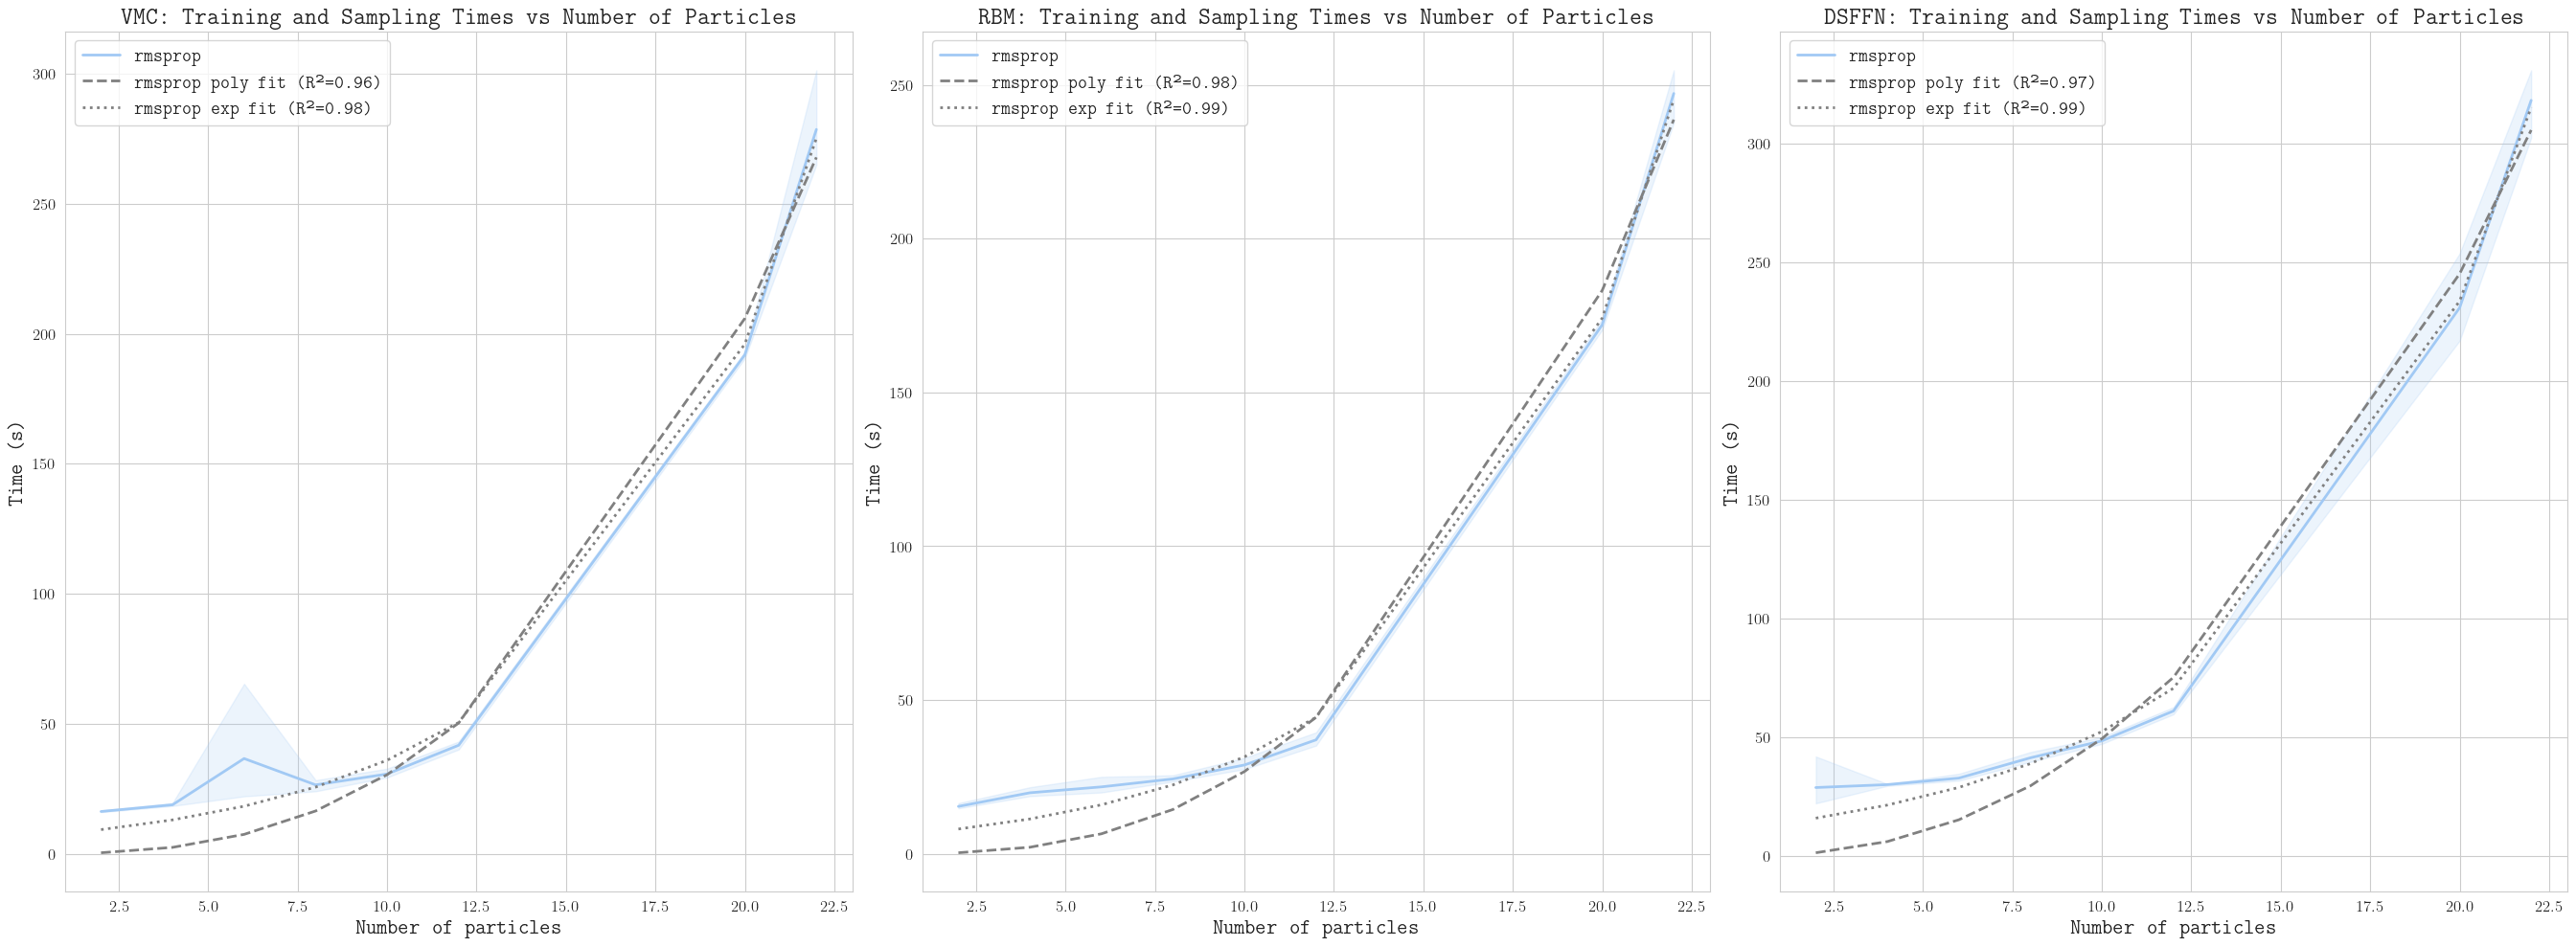

In [13]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Paths to data
DATA_PATH = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/final_results_omega_{omega}.csv"


# Combine omega
omegas = [1.0]
dfs = []
for omega in omegas:
    df = pd.read_csv(DATA_PATH.format(omega=omega))
    df["omega"] = omega
    dfs.append(df)

# Preprocess data
dfs = [df.dropna(subset=["time_train"]) for df in dfs]
dfs = [df[df["nsamples"] == 524288] for df in dfs]
dfs = [df.drop(columns=[col for col in df.columns if "time" not in col and "nqs_type" not in col and "n_particles" not in col and "Opti" not in col]) for df in dfs]
dfs = [df.sort_values(by="n_particles") for df in dfs]

print(dfs)
# Combine all dataframes into one
combined_df = pd.concat(dfs)

# Filter the data by nqs_type
df_vmc = combined_df[combined_df["nqs_type"] == "vmc"]
df_rbm = combined_df[combined_df["nqs_type"] == "rbm"]
df_dsffn = combined_df[combined_df["nqs_type"] == "dsffn"]



# Define fitting functions
def poly_fit(x, b):
    return 0.5 * x**b

def exp_fit(x, b):
    return 0.5 * np.exp(b * x)

# Function to calculate R²
def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Function to perform fits and plot
def plot_with_fits(ax, df, title):
    sns.lineplot(data=df, x="n_particles", y="time_train", hue="Opti", ax=ax)
    
    opti_types = df["Opti"].unique()
    colors = {"rmsprop": "gray"}
    
    for opti in opti_types:
        data = df[df["Opti"] == opti]
        x = data["n_particles"]
        y = data["time_train"]
        
        popt_poly, _ = curve_fit(poly_fit, x, y)
        # print coefficients
        print(f"{opti} poly fit: a={popt_poly[0]:.2f}, b={popt_poly[1]:.2f}")
        popt_exp, _ = curve_fit(exp_fit, x, y)
        # print coefficients
        print(f"{opti} exp fit: a={popt_exp[0]:.2f}, b={popt_exp[1]:.2f}")
        
        y_pred_poly = poly_fit(x, *popt_poly)
        y_pred_exp = exp_fit(x, *popt_exp)
        
        r2_poly = calculate_r2(y, y_pred_poly)
        print(f"{opti} poly fit R²: {r2_poly:.2f}")
        r2_exp = calculate_r2(y, y_pred_exp)
        print(f"{opti} exp fit R²: {r2_exp:.2f}")
        
        ax.plot(x, y_pred_poly, linestyle="--", color=colors[opti], label=f'{opti} poly fit (R²={r2_poly:.2f})')
        ax.plot(x, y_pred_exp, linestyle=":", color=colors[opti], label=f'{opti} exp fit (R²={r2_exp:.2f})')
        
    ax.set_ylabel("Time (s)")
    ax.set_xlabel("Number of particles")
    ax.set_title(title)
    ax.legend(loc="upper left")

# Plotting the time data with fits
fig, axs = plt.subplots(1, 3, figsize=(27, 10))

# VMC plot
print("vmc")
plot_with_fits(axs[0], df_vmc, "VMC: Training and Sampling Times vs Number of Particles")

# RBM plot
print("rbm")
plot_with_fits(axs[1], df_rbm, "RBM: Training and Sampling Times vs Number of Particles")

# DSFFN plot
print("dsffn")
plot_with_fits(axs[2], df_dsffn, "DSFFN: Training and Sampling Times vs Number of Particles")

plt.tight_layout()
plt.show()


In [135]:

#print complete view even if large

pd.set_option('display.max_rows', None)



# let us get total energy as a function of v_0 for all nqs_types. Let us do that only for N2, n4 and n6 particles

df = df[df["n_particles"].isin([2, 4, 6])]

# Make E value numeric and without (error) in the ty
#df["E"] = df["E"].apply(lambda x: float(x.split("(")[0]))

# write this to a csv   
#df.to_csv("/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_polarized/big_data_all.csv", index=False)

In [136]:

# Make E value numeric and without (error) in the ty
df["E"] = df["E"].apply(lambda x: float(x.split("(")[0]))

In [92]:
# Assuming df is your dataframe and is already loaded
import seaborn as sns
# Convert energy components to numeric
df["$\langle \hat{K}\rangle$"] = df["$\langle \hat{K}\rangle$"].apply(lambda x: float(x.split("(")[0]))
df["$\langle \hat{V}_{trap}\rangle$"] = df["$\langle \hat{V}_{trap}\rangle$"].apply(lambda x: float(x.split("(")[0]))
df["$\langle \hat{V}_{int}\rangle$"] = df["$\langle \hat{V}_{int}\rangle$"].apply(lambda x: float(x.split("(")[0]))